# Project : Handwritten Digit Classification
-Dataset : Mnist

-Acuracy :  0.9761

In [2]:
!pip install tensorflow

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [4]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

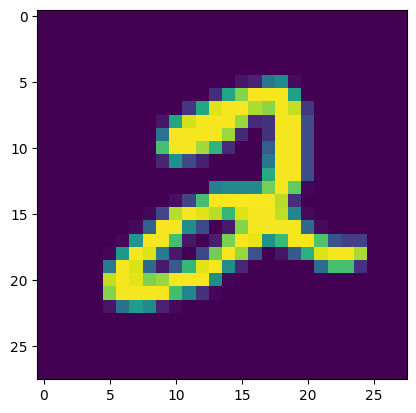

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,epochs=22,validation_split=0.2)

Epoch 1/22
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.1641 - val_accuracy: 0.9757
Epoch 2/22
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.1628 - val_accuracy: 0.9754
Epoch 3/22
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0069 - accuracy: 0.9977 - val_loss: 0.1708 - val_accuracy: 0.9762
Epoch 4/22
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0094 - accuracy: 0.9970 - val_loss: 0.1877 - val_accuracy: 0.9757
Epoch 5/22
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.2001 - val_accuracy: 0.9737
Epoch 6/22
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9976 - val_loss: 0.2286 - val_accuracy: 0.9712
Epoch 7/22
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.1776 - val_accuracy:

In [21]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
y_pred = y_prob.argmax(axis=1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print("Acuracy : ", accuracy)

Acuracy :  0.9761


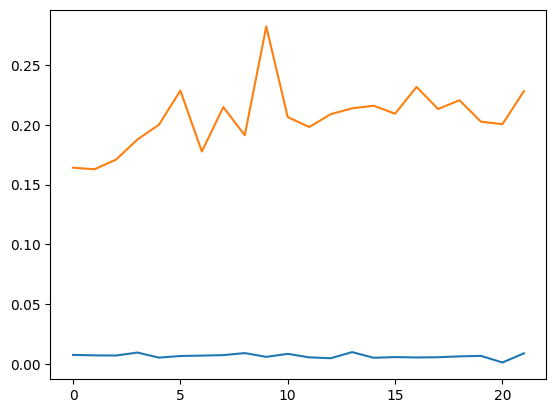

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

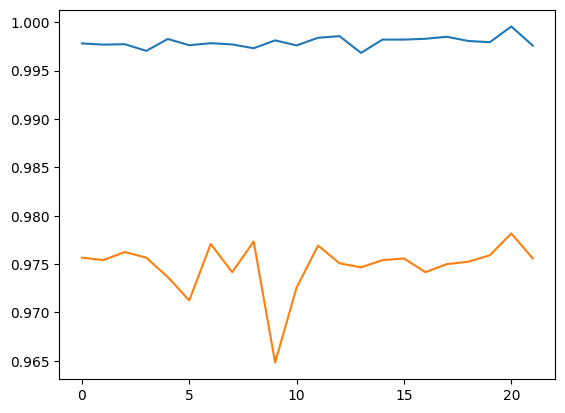

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

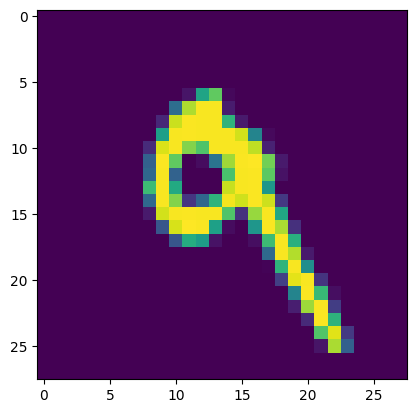

In [31]:
plt.imshow(X_test[7])

In [30]:
model.predict(X_test[7].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 19ms/step


array([9])